In [ ]:
import numpy as np
import pandas as pd #Imports the numpy and pandas packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #Mounts this notebook to google drive where the CSV file is downloaded

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/micro_world_139countries.csv"
df = pd.read_csv(path, encoding='latin-1') #Imports the FINDEX dataset from google drive, with latin-1 encoding
df.columns #Shows the columns of the dataset

Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q',
       ...
       'receive_transfers', 'receive_pension', 'receive_agriculture',
       'pay_utilities', 'remittances', 'mobileowner', 'internetaccess',
       'anydigpayment', 'merchantpay_dig', 'year'],
      dtype='object', length=128)

We want to explore the ages of the respondents of the survey, and how the age of the respondents affect their worriedness in relation to medical costs and bills.

In [ ]:
ndf = df[["age", "fin44b", "fin44c"]] #We pick out the columns that we want to work with from the datset
ndf.columns #We check the columns of the new dataframe

Index(['age', 'fin44b', 'fin44c'], dtype='object')

In [ ]:
ndf.isnull().sum() #We check for missing values

,0
age,467
fin44b,0
fin44c,0


In [ ]:
ndf = ndf.dropna() #We remove all rows with nulls
ndf

,age,fin44b,fin44c
0,43.0,2,3
1,55.0,1,1
2,15.0,1,1
3,23.0,2,1
4,46.0,2,4
...,...,...,...
143882,22.0,1,1
143883,52.0,1,1
143884,47.0,1,1
143885,18.0,1,1


Other than removing all rows with nulls, we also want to remove all rows where the respondent answered 4-6 in the column fin44b or fin44c, as these are not relevant answers to our research question.

In [ ]:
ndf = ndf[(ndf["fin44b"] < 4) & (ndf["fin44c"] < 4)] #We remove all rows where the respondent answered 4, 5 or 6 in either fin44c or fin44b
ndf

,age,fin44b,fin44c
0,43.0,2,3
1,55.0,1,1
2,15.0,1,1
3,23.0,2,1
5,30.0,1,1
...,...,...,...
143882,22.0,1,1
143883,52.0,1,1
143884,47.0,1,1
143885,18.0,1,1


In [ ]:
ndf.value_counts("fin44b") #We look at the distribution of the respondents worriedness of medical costs

,count
fin44b,
1,62617
2,39528
3,36739


In [ ]:
ndf.value_counts("fin44c") #We look at the distribution of the respondents worriedness of bills

,count
fin44c,
3,51940
1,46512
2,40432


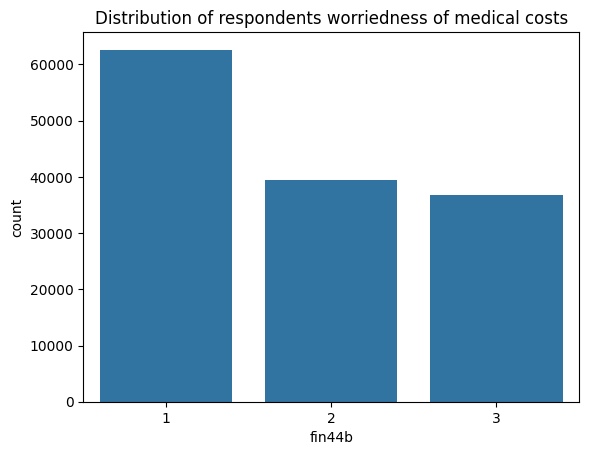

In [ ]:
import seaborn as sns # Imports the seaborn package, that allows us to make visual representations of distributions etc.
sns.countplot(x="fin44b", data=ndf) #We show a histogram of the distribution of worriedness of medical costs
plt.title("Distribution of respondent's worriedness of medical costs")
plt.show()

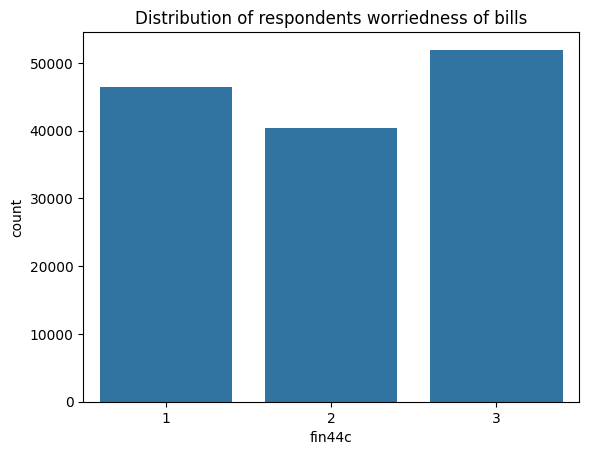

In [ ]:
sns.countplot(x="fin44c", data=ndf) #We show a histogram of the distribution of worriedness of bills
plt.title("Distribution of respondents worriedness of bills")
plt.show()

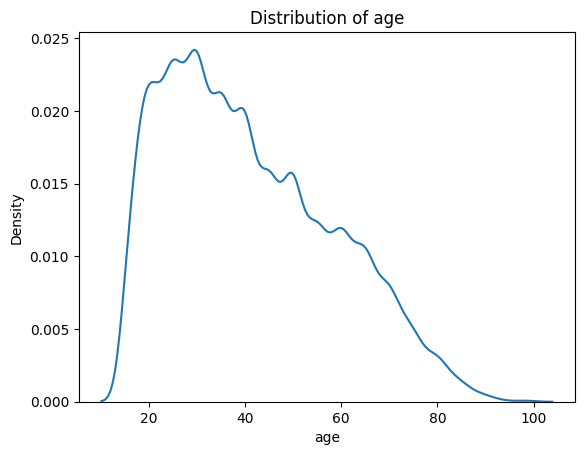

In [ ]:
rowssns.kdeplot(ndf["age"], label="Age").set_title("Distribution of Age") #We show a density function of age
plt.title("Distribution of age")
plt.show()

Text(0.5, 1.0, 'Box Plot of age of respondents')

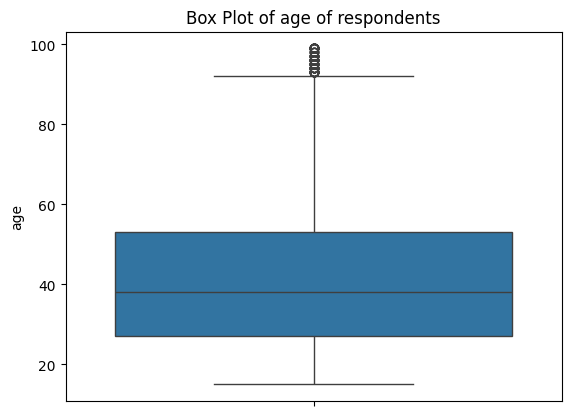

In [ ]:
sns.boxplot(data=ndf, y="age").set_title("Box Plot of age of respondents") #We look at boxplot of the respondents age, so we can identify outliers

In [ ]:
from scipy.stats import zscore #Imports the zscore function, that allows us to identify outliers
zage = zscore(ndf["age"]) #Finds the z-scores for the age column
zage

,age
0,0.112109
1,0.806348
2,-1.507780
3,-1.044954
5,-0.639982
...,...
143882,-1.102808
143883,0.632788
143884,0.343522
143885,-1.334220


In [ ]:
ndf["outlier_age"] = (zage > 3) | (zage < -3) #Makes a boolean array that indicates whether a column has an outlier in age or not
ndf #The full dataframe with the new boolean array

<ipython-input-180-28e220ba42ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['outlier_age'] = (zage > 3) | (zage < -3) #Makes a boolean array that indicates whether a column has an outlier in age or not


,age,fin44b,fin44c,outlier_age
0,43.0,2,3,False
1,55.0,1,1,False
2,15.0,1,1,False
3,23.0,2,1,False
5,30.0,1,1,False
...,...,...,...,...
143882,22.0,1,1,False
143883,52.0,1,1,False
143884,47.0,1,1,False
143885,18.0,1,1,False


In [ ]:
ndf_cage = ndf[~ndf["outlier_age"]] #Removes all rows with outliers regarding age
ndf_c = ndf_cage[["age", "fin44b", "fin44c"]] #Removes the last column, as we have no use for them anymore
ndf_c

,age,fin44b,fin44c
0,43.0,2,3
1,55.0,1,1
2,15.0,1,1
3,23.0,2,1
5,30.0,1,1
...,...,...,...
143882,22.0,1,1
143883,52.0,1,1
143884,47.0,1,1
143885,18.0,1,1


In [ ]:
ndf_c.dtypes #We check the datatype of the different columns, but find no inconsistencies

,0
age,float64
fin44b,int64
fin44c,int64


In [ ]:
agg_data = ndf_c[["age", "fin44b", "fin44c"]].agg(["mean"]) # We show the mean for each column
agg_data

,age,fin44b,fin44c
mean,41.027637,1.813447,2.038935
min,15.000000,1.000000,1.000000
max,92.000000,3.000000,3.000000


In [ ]:
ndf_c.groupby(["age"])[["fin44b", "fin44c"]].agg(["mean"]) # We show the mean value of fin44b and fin44c in regards to the age of the respondent

,fin44b,fin44c
,mean,mean
age,,
15.0,1.756559,1.995729
16.0,1.812361,2.002227
17.0,1.798399,2.001001
18.0,1.779868,1.981499
19.0,1.783106,2.024714
...,...,...
88.0,2.330097,2.514563
89.0,2.394737,2.578947


In [ ]:
ndf_c.groupby(["fin44b"])[["age"]].agg(["mean"]) #We show the average age of the respondent in regards to each answer for worriedness of medical costs

,age
,mean
fin44b,
1,39.506072
2,40.332152
3,44.371951


In [ ]:
ndf_c.groupby(["fin44c"])[["age"]].agg(["mean"]) #We show the average age of the respondent in regards to each answer for worriedness of bills

NameError: name 'ndf_c' is not defined

In [ ]:
ndf_c.describe() #We show the mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile and maximum values of each column

,age,fin44b,fin44c
count,138797.000000,138797.000000,138797.000000
mean,41.027637,1.813447,2.038935
std,17.235354,0.824915,0.840974
min,15.000000,1.000000,1.000000
25%,27.000000,1.000000,1.000000
50%,38.000000,2.000000,2.000000
75%,53.000000,3.000000,3.000000
max,92.000000,3.000000,3.000000


In [ ]:
#We can calculate the variance of each column, by using the standard deviation:
print(ndf_c["age"].var(), ndf_c["fin44b"].var(), ndf_c["fin44c"].var())

297.0574222787955 0.6804849027567342 0.7072365027997953


In [ ]:
corrmat = ndf_c[["age", "fin44b", "fin44c"]].corr(method="spearman") #We create a correlation matrix, to look at the correlations between the different variables

Text(0.5, 1.0, 'Correlation Matrix')

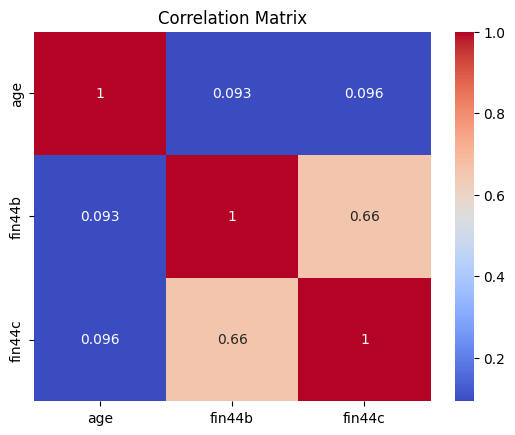

In [ ]:
sns.heatmap(corrmat, annot=True, cmap="coolwarm").set_title("Correlation Matrix") #We create a heatmap, so we can visually see the correlations between each variable.

After looking at the correlations between the variables, we can also look at whether there is any difference in age, in regards to how worried the respondents are. We perform an ANOVA test, to test the hypothesis. The H0-hypothesis is that there is no significant difference in age, for each level of worriedness in relation to medical costs.

F-statistic: 980.4652689161429
P-value: 0.0


<Figure size 1000x600 with 0 Axes>

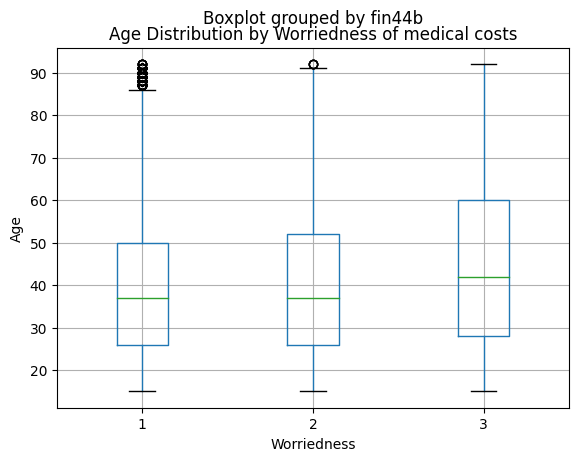

In [ ]:
from scipy import stats #We perform an ANOVA test to teste the above hypothesis.
level_worried1 = ndf_c[ndf_c["fin44b"] == 1]["age"] #We filter the worriedness of medical costs to only include people with very high worriedness
level_worried2 = ndf_c[ndf_c["fin44b"] == 2]["age"] #We filter the worriedness of medical costs to only include people with medium worriedness
level_worried3 = ndf_c[ndf_c["fin44b"] == 3]["age"] #We filter the worriedness of medical costs to only include people with no worriedness

f_stat, p_value = stats.f_oneway(level_worried1, level_worried2, level_worried3) #We perform the ANOVA test
print("F-statistic:", f_stat) #We print the f-statistic
print("P-value:", p_value) #We print the p-value

plt.figure(figsize=(10, 6))
ndf_c.boxplot("age", by="fin44b")
plt.title("Age Distribution by Worriedness of medical costs")
plt.xlabel("Worriedness")
plt.ylabel("Age")
plt.show()

An f-statistic of 980 is relatively high, and therefore suggests that there is a significant difference in age, in relation to how worried the respondent is of medical costs. The p-value of 0, suggests the same conclusion as it is 0, so we reject the H0-hypothesis. In the boxplot above, we can see there seems to be visual differences as well in regards to the age of the respondents in relation to worriedness of medical costs. For example we can see that the 75 percentile of peoplse responding 1 to the question is 50, while the 75 percentile of people responding 3 is 60 years old.